In [56]:
import pandas
df = pandas.read_csv('data/2021-01.csv')
# df.head(10)
df.columns=['time','a','b','c','production','consumption']
df.drop(['a', 'b', 'c'], axis=1, inplace=True)
df['time'] = pandas.to_datetime(df['time'], format='%d.%m.%Y %H:%M')
df=df[(df.consumption!=0) | (df.production!=0)]


In [57]:
(df[df.production!=0]).head(20)
# df.head(20)

,time,production,consumption
514,2020-01-01 08:34:00,104,198.9108
519,2020-01-01 08:39:00,489,441.3391
524,2020-01-01 08:44:00,762,399.3709
529,2020-01-01 08:49:00,961,178.1862
534,2020-01-01 08:54:00,1225,183.7023
539,2020-01-01 08:59:00,1433,186.3008
544,2020-01-01 09:04:00,1643,384.6511
549,2020-01-01 09:09:00,1803,192.8403
554,2020-01-01 09:14:00,1939,204.7935
559,2020-01-01 09:19:00,2179,187.4963


# calculate difference between two rows

In [58]:
c=[]
prev=df.iloc[0]
for i, row in df.iterrows():
    c.append(row['consumption']-prev['consumption'])
    prev=row
df['consumption_d']=c

# ignore rows with difference <50 and consumption <250

In [59]:
# df=df[(df.consumption_d<-50) | (df.consumption_d>50) | (df.consumption>250)]
# df=df[(df.consumption_d<-50) | (df.consumption_d>50) ]

# calculate wh between up and down
ignore differencey below 50w

In [93]:
c=[]
prev=True
prevI=0
i=0
for index, row in df.iterrows():
    if row['consumption']>300:
        count=0
        for x in range(prevI,i):
            verbrauch=abs(df.iloc[x+1]['consumption']-df.iloc[x]['consumption'])/2+df.iloc[x]['consumption']
            count+=verbrauch*(df.iloc[x+1]['time']-df.iloc[x]['time']).seconds/3600
        c.append(count)
        prevI=i
    elif i==0:
        pass
    else:
        c.append(0)
    prev=row['consumption_d']
    i=i+1
#     if index==59:
#         break;
# print(c)
df['wh']=c

## altenative

In [85]:
c=[]
prev=True
prevI=0
i=0
for index, row in df.iterrows():
    if row['consumption_d']>0 and prev<-100:
        count=0
        for x in range(prevI,i):
            verbrauch=abs(df.iloc[x+1]['consumption']-df.iloc[x]['consumption'])/2+df.iloc[x]['consumption']
            count+=verbrauch*(df.iloc[x+1]['time']-df.iloc[x]['time']).seconds/3600
        c.append(count)
        prevI=i
    elif row['consumption_d']<0 and prev>100:
        count=0
        for x in range(prevI,i):
            verbrauch=abs(df.iloc[x+1]['consumption']-df.iloc[x]['consumption'])/2+df.iloc[x]['consumption']
            count+=verbrauch*(df.iloc[x+1]['time']-df.iloc[x]['time']).seconds/3600
        c.append(count)
        prevI=i
    elif i==0:
        pass
    else:
        c.append(0)
    prev=row['consumption_d']
    i=i+1
#     if index==59:
#         break;
# print(c)
c.append(0)
df['wh']=c

<AxesSubplot:xlabel='time', ylabel='[wh]'>

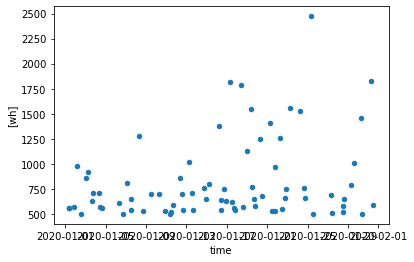

In [109]:
df[(df.wh>500)].plot(x='time', y=['wh'], kind='scatter')

<AxesSubplot:xlabel='consumption', ylabel='[wh]'>

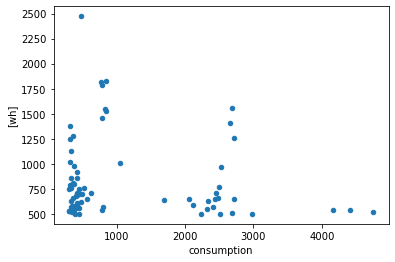

In [106]:
df[(df.wh>500)].plot(x='consumption', y=['wh'], kind='scatter')

In [110]:
# (df[(df.wh>500) & (df.production > 0)]).info()
# (df[df.production!=0]).head(20)
# df.head(11)
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)


                     time  production  consumption  consumption_d           wh
4     2020-01-01 00:04:00           0     362.4184         0.0000     0.000000
9     2020-01-01 00:09:00           0     443.5140        81.0956    33.580517
14    2020-01-01 00:14:00           0     419.4362       -24.0778    37.962742
19    2020-01-01 00:19:00           0     419.7759         0.3397    34.967171
24    2020-01-01 00:24:00           0     307.7461      -112.0298    39.649233
29    2020-01-01 00:29:00           0     379.1712        71.4251    28.621554
34    2020-01-01 00:34:00           0     407.4000        28.2288    32.773800
39    2020-01-01 00:39:00           0     313.0332       -94.3668    37.881950
44    2020-01-01 00:44:00           0     286.2454       -26.7878     0.000000
49    2020-01-01 00:49:00           0     272.4908       -13.7546     0.000000
54    2020-01-01 00:54:00           0     272.5772         0.0864     0.000000
59    2020-01-01 00:59:00           0     485.7647  

In [89]:
(df[(df.wh>500)]).head()

,time,production,consumption,consumption_d,wh
239,2020-01-01 03:59:00,0,344.6189,214.2189,521.524929
519,2020-01-01 08:39:00,489,441.3391,242.4283,561.402967
574,2020-01-01 09:34:00,2737,4649.2520,121.9747,1182.857617
889,2020-01-01 14:49:00,3240,2036.6925,1988.3395,634.162208
1229,2020-01-01 20:29:00,0,269.8211,-143.0187,735.029318
